# 1 Load libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import itertools
from xgboost import XGBClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# 2 Load datasets

In [89]:
train = pd.read_csv('data/train_after_missing_value.csv')
test = pd.read_csv('data/test_after_missing_value.csv')

In [90]:
sample_submission = pd.read_csv('input/sample_submission.csv', index_col='TransactionID')

In [91]:
print(train.shape)
print(test.shape)

(590540, 289)
(506691, 289)


# 3 XGboost

In [92]:
y = train["isFraud"].copy()
train_data = train.drop('isFraud', axis=1)

In [93]:
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.3, stratify = y, random_state=3)

In [95]:
print(y_train.shape)
print(x_train.shape)

(413378,)
(413378, 289)


In [96]:
clf = XGBClassifier(objective = 'binary:logistic',
                   gamma = 0.05,
                   colsample_bytree = 0.5, 
                   eval_metric = 'auc',
                   n_estimators = 1350,         
                   max_depth = 8,
                   min_child_weight = 2, 
                   learning_rate = 0.02,
                   subsample = 0.8,
                   n_jobs = -1,
                   silent = False,
                   verbosity = 0)        
                

print("starting training process.....") 
clf.fit(x_train, y_train)

starting training process.....


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0.05, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.02, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=1350, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [97]:
y_pred = clf.predict_proba(x_test)[:,1]
print(y_pred)

[3.9969709e-06 3.1468917e-06 5.9150548e-06 ... 1.0361002e-05 1.3735687e-05
 3.8228659e-06]


In [100]:
metrics.accuracy_score(y_test, y_pred.round())*100

100.0

# 4 Confusion matrix

In [101]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

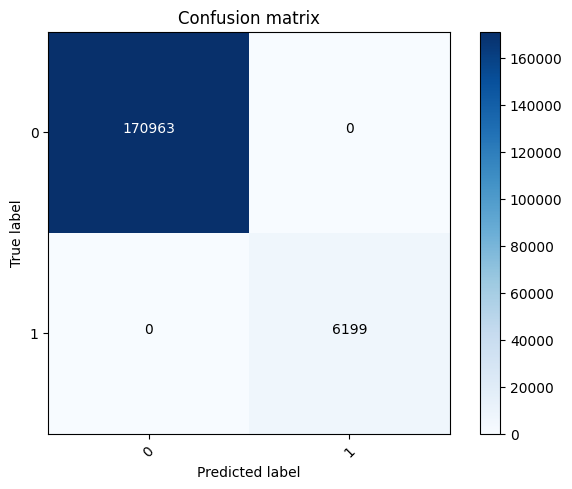

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred.round()) 
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

# 5 Submission

In [108]:
thisisit = clf.predict_proba(test)[:,1]

In [111]:
TransactionID = test.TransactionID
result = pd.DataFrame({'TransactionID': TransactionID ,'isFraud':thisisit.round()})
# result.to_csv('msubmission.csv', index = False)


In [112]:
result

,TransactionID,isFraud
0,3663549,0.0
1,3663550,0.0
2,3663551,0.0
3,3663552,0.0
4,3663553,0.0
...,...,...
506686,4170235,0.0
506687,4170236,0.0
506688,4170237,0.0
506689,4170238,0.0


In [ ]:
sample_submission.to_csv('sample_xgboost.csv')